# WeatherAPI
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Includes a print log of each city as it's being processed (with the city number and city name).

In [3]:
# Saving base URL and changing units from metric to imperial
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
record_count = 1
set_count = 1

# Lists to pull in data from Weather API
names = []
lat = []
lng = []
current_temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through cities and collect weather data json file.  Print out name and record/set number.  Sleep for 60 seconds after each 50 record pull.
for city in cities:
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    response = requests.get(query_url + city).json()
    try:
        names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        current_temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(f"{city} not found in weather site.")
    record_count += 1
    if record_count % 50 == 0:
        set_count += 1
        time.sleep(60)

Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | rudsar
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | kapa'a
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | verkhnevilyuysk
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | ternate
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | couzeix
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | sur
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Set 1 | felipe carrillo puerto
Processing Record 24 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Check to make sure data has been evenly pulled
lists = {
    "names": names,
    "lat": lat,
    "lng": lng,
    "current_temp": current_temp,
    "max_temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "country": country,
    "date": date
}
for list in lists:
    print(f"The length of {list} is {len(lists[list])}")



The length of names is 586
The length of lat is 586
The length of lng is 586
The length of current_temp is 586
The length of max_temp is 586
The length of humidity is 586
The length of cloudiness is 586
The length of wind_speed is 586
The length of country is 586
The length of date is 586


In [5]:
# Create dict and set up data frame for data.  Output the data to a csv file.
weather_dict = {
    "Name": names,
    "Latitude": lat,
    "Longitude": lng,
    "Current Temp": current_temp,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file)

weather_data.head()

,Name,Latitude,Longitude,Current Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.5544,-151.2583,19.45,19.45,100,100,4.61,US,1710170681
1,Rūdsar,37.1376,50.2880,49.98,49.98,91,100,3.24,IR,1710170681
2,Thompson,55.7435,-97.8558,24.96,24.96,93,20,0.00,CA,1710170388
3,Kapaa,22.0752,-159.3190,66.24,69.78,92,100,9.22,US,1710170682
4,Yellowknife,62.4560,-114.3525,12.72,12.72,73,100,8.05,CA,1710170682


In [6]:
weather_data.describe()

,Latitude,Longitude,Current Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.387962,22.174546,57.511297,57.957696,68.926621,58.259386,8.593549,1.710171e+09
std,32.147518,88.579759,28.597792,28.597613,24.067705,39.540060,5.934431,2.567675e+02
min,-54.800000,-176.559700,-24.180000,-24.180000,4.000000,0.000000,0.000000,1.710170e+09
25%,-5.549275,-59.846925,37.727500,39.240000,55.000000,20.000000,4.250000,1.710171e+09
50%,25.000800,26.883150,65.045000,65.175000,74.000000,74.000000,6.980000,1.710171e+09
75%,47.252325,98.076200,80.057500,80.122500,89.000000,99.000000,11.500000,1.710171e+09
max,78.218600,178.004200,107.420000,107.420000,100.000000,100.000000,33.910000,1.710172e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Check to see if any cities have Humidity > 100.

In [7]:
weather_data[weather_data['Humidity'] > 100].count()

Name            0
Latitude        0
Longitude       0
Current Temp    0
Max Temp        0
Humidity        0
Cloudiness      0
Wind Speed      0
Country         0
Date            0
dtype: int64

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data

## Latitude vs. Temperature Plot

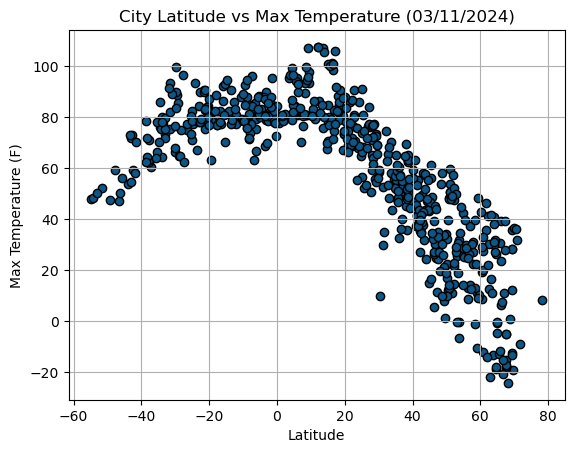

In [85]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temp'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (03/11/2024)")
plt.grid(True)
plt.savefig('../Output/Lat_v_Temp.png')
plt.show()

There appears to be a strong correlation between max temperature and latitude.  As latitude increases (we move farther north away from the equator), the max temperature of the cities drops.

## Latitude vs. Humidity Plot

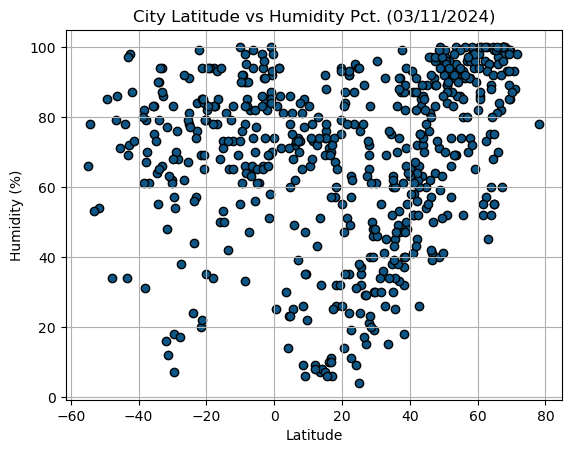

In [86]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity Pct. (03/11/2024)")
plt.grid(True)
plt.savefig('../Output/Lat_v_Humidity.png')
plt.show()

There doesn't appear to be any kind or correlation between Latitude and Humidity percentage based on our city sample.

## Latitude vs. Cloudiness Plot

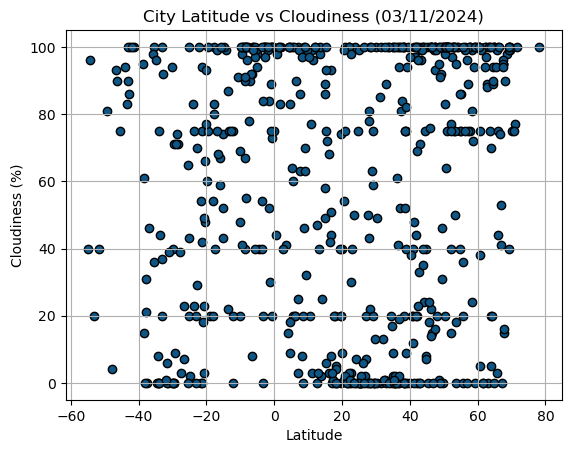

In [87]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (03/11/2024)")
plt.grid(True)
plt.savefig('../Output/Lat_v_Cloudiness.png')
plt.show()

There doesn't appear to be any kind of correlation between latitude and cloudiness percentage based on our city sample.

## Latitude vs. Wind Speed Plot

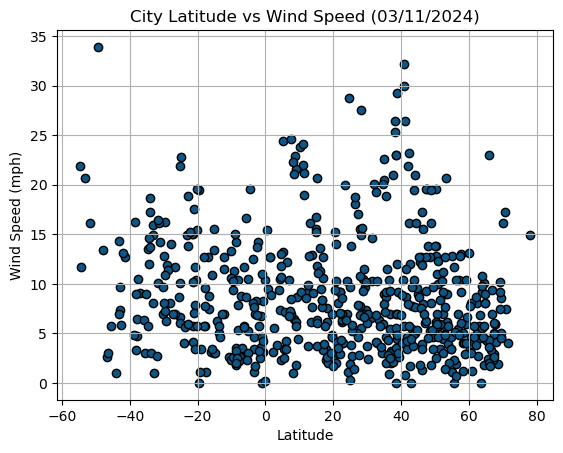

In [88]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (03/11/2024)")
plt.grid(True)
plt.savefig('../Output/Lat_v_WindSpeed.png')
plt.show()

There doesn't appear to be any kind of correlation between latitude and wind speed based on our city sample.

## Linear Regression

In [77]:
# For each of the above plots calculate and plot a linear regression using the steps below
from sklearn.linear_model import LinearRegression

# Create linear regression function
def linear_regression(df,x,y):
# Set your x and y and reshape to np array
    xval = df[x].values.reshape(-1, 1)
    yval = df[y].values.reshape(-1, 1)

# Fit your Model
    linear_regressor = LinearRegression().fit(xval, yval)
# Slope of regression line equation
    m = linear_regressor.coef_[0]
    b = linear_regressor.intercept_
# Generate predictions and store in df
    df['YPRED'] = linear_regressor.predict(xval)
# Print the r-sqared value
    print(f"The r2-value is: {linear_regressor.score(xval, yval)}")
# Plot the data
    ax = df.plot.scatter(x=x, y=y)
    ax.text(0.25, 0.05, f"y = {round(m[0], 2)}x + {round(b[0], 2)}", transform=ax.transAxes, va='top', color='red')
    df.plot(x=x, y='YPRED', color='red', ax=ax)

In [54]:
# Split dataframe into northern and southern hemishphere data sets, where northern hemisphere includes 
# all cities with latitude >= 0, and southern hemisphere includes all cities with latitude < 0.

northern_hemisphere = weather_data[weather_data['Latitude'] >= 0].copy()
southern_hemisphere=weather_data[weather_data['Latitude'] < 0].copy()

print(f"The total number of cities in the northern hemisphere for our sample is {len(northern_hemisphere)}")
print(f"The total number of cities in the southern hemisphere for our sample is {len(southern_hemisphere)}")
#linear_regression(weather_data,'Latitude','Max Temp')

The total number of cities in the northern hemisphere for our sample is 408
The total number of cities in the southern hemisphere for our sample is 178


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r2-value is: 0.770141704700714


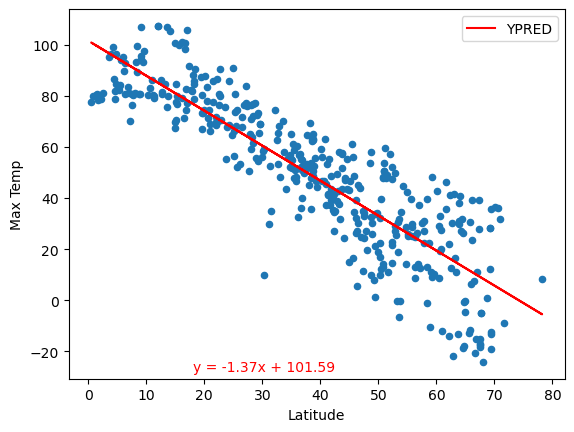

In [71]:
linear_regression(northern_hemisphere,'Latitude','Max Temp')

Based on the linear regression and the R-squared value, we can see that latitude has an impact on max temperature.  Latitude accounts for 77% of the variance within max temperature, meaning that this model is a good fit and that latitude is a good predictor for temperature.  Based on the model, we can see that the max temperature of the cities drops by 1.37 degrees for each positive degree of latitude, indicating that the further north away from the equator we get, the max temperature of those cities drops.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r2-value is: 0.3395567584296483


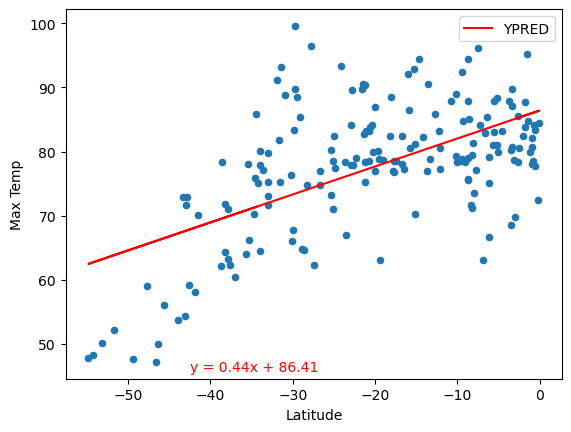

In [72]:
linear_regression(southern_hemisphere,'Latitude', 'Max Temp')

Based on the linear regression and the R-squared value, we can see that latitude has an impact on max temperature cities in the southern hemisphere.  It shows that as cities get closer to the equator, their max temperature increases. However, the model fit is not as strong for the southern hemisphere (0.339 r-squared value) as it is for the northern hemisphere cities.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r2-value is: 0.23058823632153091


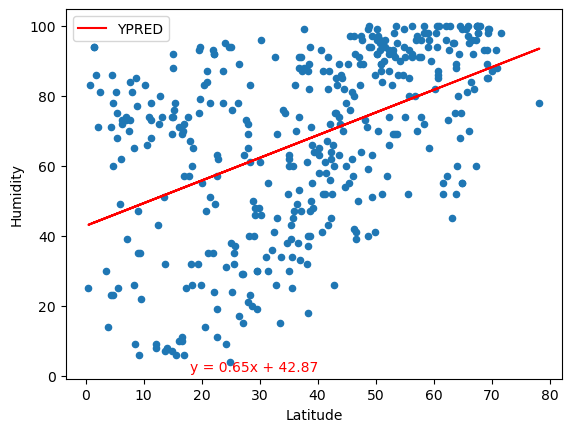

In [78]:
linear_regression(northern_hemisphere,'Latitude','Humidity')

Based on the regression model, there appears to be a slight positive relationship between latitude and humidity where the further we get from the equator, the greater the humidity.  However, the r-squared value is not strong (0.23) indicating that there are other variables at play that would impact humidity levels more than latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r2-value is: 0.04027314336835719


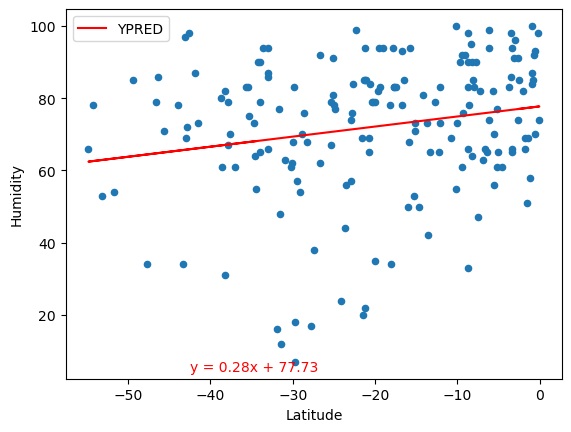

In [79]:
linear_regression(southern_hemisphere,'Latitude','Humidity')

This regression model shows us that latitude really doesn't have an impact on humidity for cities in the southern hemisphere as the r-squared value is so low that hardly any of the variance in humidity is explained by latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r2-value is: 0.056243762350948745


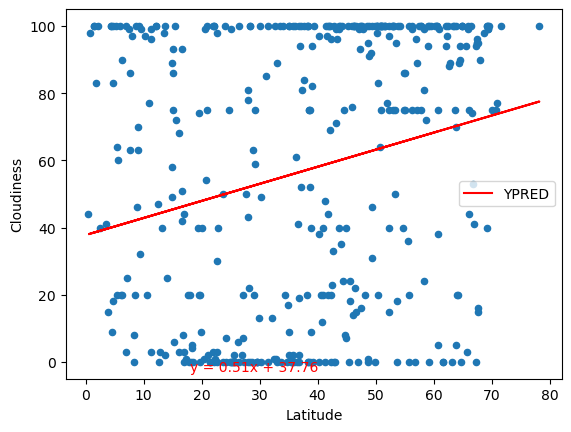

In [80]:
linear_regression(northern_hemisphere,'Latitude','Cloudiness')

There appears to be no relationship between latitude and cloudiness, and the r-squared value here is low enough that we should consider other variables besides latitude that might explain cloudiness levels in northern hemisphere cities.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r2-value is: 0.08355532565666213


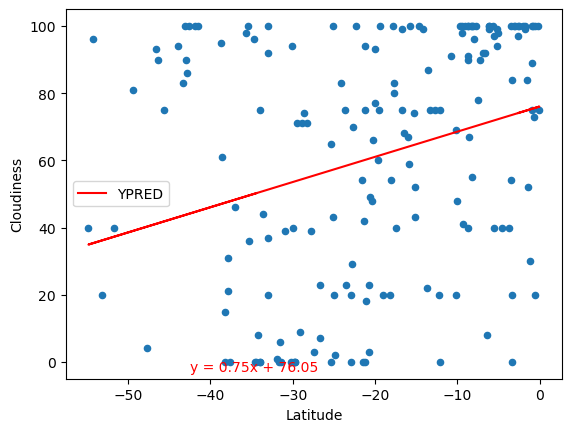

In [81]:
linear_regression(southern_hemisphere,'Latitude','Cloudiness')

The same holds true for southern hemisphere cities where there appears to be no kind of correlation between latitude and cloudiness, and the r-squared value of 0.08 indicates that we should look at other potential variables to determine if they have an impact on cloudiness levels of southern hemisphere cities.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r2-value is: 0.031877503680096675


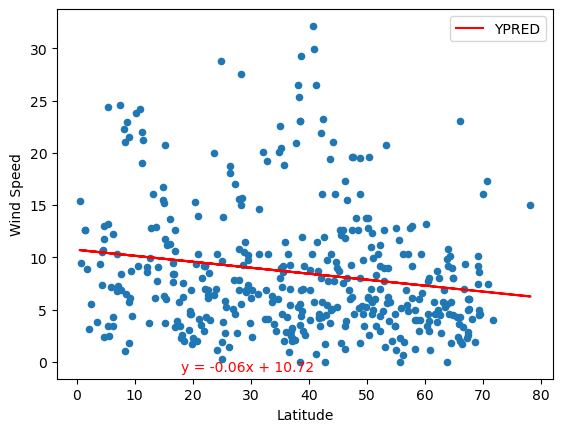

In [82]:
linear_regression(northern_hemisphere,'Latitude','Wind Speed')

The r-squared value is one of the lowest we've seen of all of our plots and again indicates that we should look at including other variables within our model to see if that impacts wind speed in northern hemisphere cities more than latitude does.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r2-value is: 0.11478247952554577


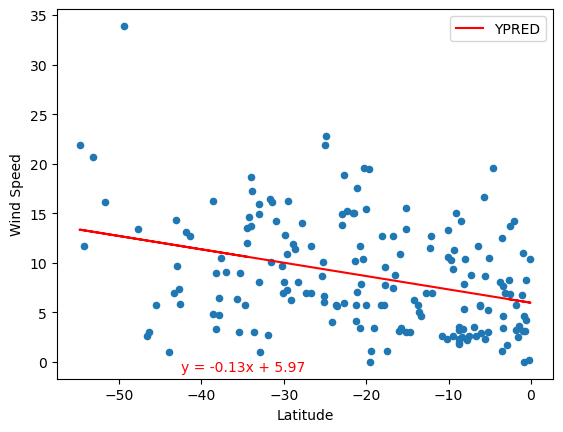

In [84]:
linear_regression(southern_hemisphere,'Latitude','Wind Speed')

The low r-squared value in this model is again an indicator that latitude is not a strong predictor for wind speed in southern hemisphere cities, and we should look at examining other potential variables to see if those might have a great impact.

# Conclusion
Based on our analysis, our assumption that latitude impacts max temperature appears to have been borne out.  There is a positive relationship between southern hemisphere cities having higher max temperatures as they get closer to the equator, and a negative relationship where northern hemisphere cities have a lower max temperature as they get further away from the equator.  However, distance from the equator does not appear to have any impact on the other weather factors that we analyzed (wind speed, cloudiness, and humidity).